In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Setting

<img src="https://images.squarespace-cdn.com/content/v1/55501468e4b03722d38ae235/1498698450762-HF3PW0YL0DUZU8B4GDFJ/ke17ZwdGBToddI8pDm48kBfJC82zr283-cptPlVKgQIUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcd9e2Mb_4PGzQYorYK1FGDx2ihWORperDqbUwktHHJZwWMTr4BaoqJ9cIcRn0xT6B/dogs.png?format=1500w" width=500 >

In this exercise, we  study all dogs registered in New York City (NYC) in 2015. The dataset contains the information of every dog registered in NYC in 2015. A description of the columns is as follows:


 |Column Name |	Column Description |	
 |---|---|
 |AnimalName|The name of the animal|
|AnimalGender|F: Female, M: Male|
|AnimalBirthYear|The year of birth of the animal|
|AnimalBirthMonth|The month of birth of the animal|
|BreedName|The name of the breed of the animal|
|Borough| Borough of NYC|
|LicenseIssuedYear|In which year the license was issued|
|LicenseIssuedMonth|In which month the license was issued|





In [291]:
Dog=pd.read_csv("Dog.csv")
Dog

,Unnamed: 0,AnimalName,AnimalGender,AnimalBirthYear,AnimalBirthMonth,BreedName,Borough,LicenseIssuedYear,LicenseIssuedMonth
0,0,ROCCO,M,2011,10,Boxer,Brooklyn,2015,1
1,1,LUIGI,M,2005,9,Maltese,Bronx,2015,1
2,2,PETUNIA,F,2013,8,Pug,Brooklyn,2015,3
3,3,ROMEO,M,2008,10,Maltese,Bronx,2015,3
4,4,BRANDY,M,2004,1,Unknown,Brooklyn,2015,3
...,...,...,...,...,...,...,...,...,...
40969,40969,OATIS,M,2013,4,Boxer,Bronx,2015,12
40970,40970,BUDDY,M,2014,8,American Pit Bull Mix / Pit Bull Mix,Staten Island,2015,12
40971,40971,CALLY,F,2012,12,Australian Cattle Dog,Manhattan,2015,12
40972,40972,SOFIE,M,2015,10,Yorkshire Terrier,Manhattan,2015,12


## Q1. 

* Report the **top 5 most popular names** (based on the frequency) and their associated frequencies **for male dogs**. 
* Report the **top 5 most popular names** (based on the frequency) and their associated frequencies  **for female dogs**.
* Use a bar chart to give the frequency of the top 5 popular names **for male dogs**. Put the name on the x-axis and put the frequency on the y-axis. 
* Use a bar chart to give the frequency of the top 5 popular names **for female dogs**. Put the name on the x-axis and put the frequency on the y-axis. 

 

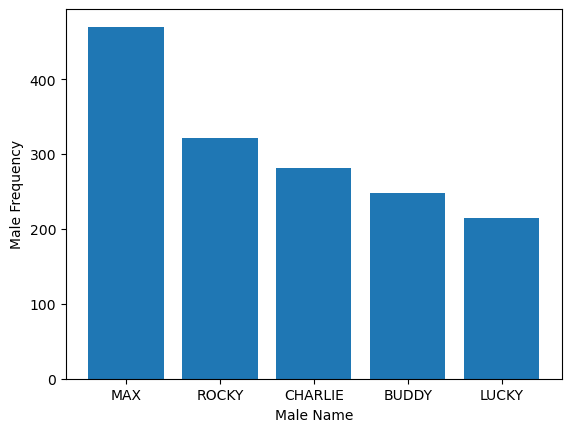

In [292]:
Filter = (Dog.AnimalGender == "M")
Male = Dog[Filter]

Frequency = Male.AnimalName.value_counts().head(5)
#Bar chart
plt.bar(Frequency.index, Frequency)

plt.xlabel("Male Name")
plt.ylabel("Male Frequency")

plt.show()

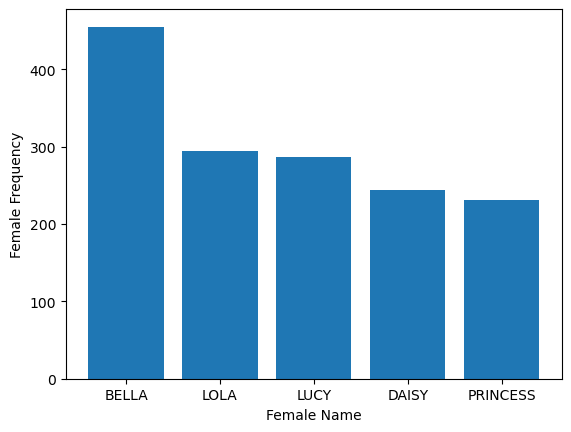

In [293]:
Filter2 = (Dog.AnimalGender == "F")
Female = Dog[Filter2]

Frequency2 = Female.AnimalName.value_counts().head(5)
#Bar chart
plt.bar(Frequency2.index, Frequency2)

plt.xlabel("Female Name")
plt.ylabel("Female Frequency")

plt.show()

## Q2.

Assume we compute a dog's age at registration using 

Age = LicenseIssuedYear-AnimalBirthYear+(LicenseIssuedMonth-AnimalBirthMonth)/12

* Visualize the distribution of Age at registration in the dataset. 

* Which borough has the oldest dogs at registration? 

> * Use maximum within each borough to do the comparison
> * Use median within each borough to do the comparison 
> * Use mean within each borough to do the comparison 

 


In [294]:
Dog["Age"] =  Dog.LicenseIssuedYear-Dog.AnimalBirthYear+(Dog.LicenseIssuedMonth-Dog.AnimalBirthMonth)/12

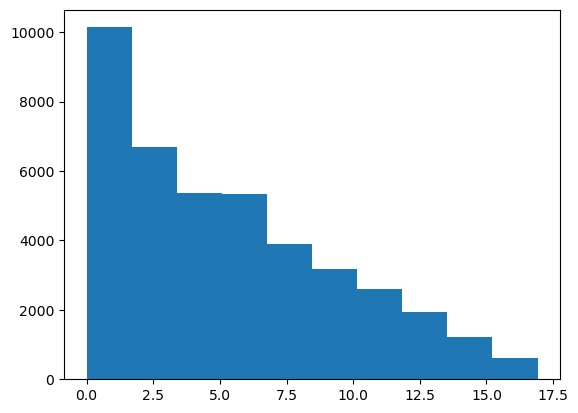

In [295]:
plt.hist(Dog["Age"])
plt.show()

In [296]:
boroughs = Dog.groupby(by= "Borough")
boroughs["Age"].max()
# Extract Age from the the boroughs, which was split into 5 columns.

Borough
Bronx            16.833333
Brooklyn         16.916667
Manhattan        16.916667
Queens           16.833333
Staten Island    16.916667
Name: Age, dtype: float64

In [297]:
boroughs["Age"].median()

Borough
Bronx            4.000000
Brooklyn         4.166667
Manhattan        4.416667
Queens           4.750000
Staten Island    6.000000
Name: Age, dtype: float64

In [298]:
boroughs["Age"].mean()

Borough
Bronx            4.852001
Brooklyn         5.062923
Manhattan        5.294120
Queens           5.482705
Staten Island    6.296646
Name: Age, dtype: float64

## Q3. 

An anlyst is interesting in whether the registration get busier during certain months 

* Use a line plot with marker="o" to show the relationship between licence month (x-axis) and the **percentage** of records belonging to the licence month (y-axis) among all applications.


For this question, do not worry about the difference in the number of days of each month.
